In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


In [2]:
df = pd.read_csv('C:\Users\USER\Desktop\Client Data Projects\pergas_app\artifacts\df.csv')

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 

# Function to pre process
def pre_process(df):
    # Initialize stop words and an optional stemmer
    nltk_stop_words = set(stopwords.words("english"))
    stemmer = PorterStemmer()  # Optional: Initialize the stemmer

    # Add your custom stop words to the NLTK stop words list
    custom_stop_words = ["pertanyaan", "tentang", "bin", "bte", "mengenai", "enquiry", "berkenaan"]

    # Combine the default stop words and custom stop words
    all_stop_words = nltk_stop_words.union(custom_stop_words)

    # Remove all punctuation from the 'Description' column
    df['Description'] = df['Description'].str.replace(r'[^\w\s]', '')

    cleaned_data = []

    for text in df['Description']:
        words = text.lower().split()  # Convert to lowercase and split into words
        filtered_words = [word for word in words if word not in all_stop_words]  # Remove stop words

        # Optional: Apply stemming
        stemmed_words = [stemmer.stem(word) for word in filtered_words]

        cleaned_text = " ".join(filtered_words)  # Rejoin the words
        cleaned_data.append(cleaned_text)

    df['Description'] = cleaned_data
    
    return df

# DBSCAN

In [6]:
pre_process(df)

,Day,Date,Week,Start Time,Hour,Source,Purpose of contact,Description,Is the enquirer a student?,Category,Action Taken,Is the case forwarded to officer-in-charge?,Has the problem resolved?,Attended by,Closed by,End Date,End Time,time_taken,tokens,time_taken_seconds
0,Monday,2022-08-01,1,2023-10-24 12:38:00,12,Email,Enquiry,permintaan surat sekolah translate english,Yes,General,NaN,Yes,Pending,NaN,NaN,NaN,NaN,NaN,"['permintaan', 'surat', 'sekolah', 'translate'...",NaN
1,Monday,2022-08-01,1,2023-10-24 15:45:00,15,Email,Transaction,registration spi august,No,Registration,pembayaran diterima,Yes,Yes,Hidayah,Hidayah,2022-08-01,2023-10-24 19:09:00,0 days 03:24:00,"['registration', 'spi', 'august']",12240.0
2,Monday,2022-08-01,1,2023-10-24 14:50:00,14,Email,Enquiry,"buku, pembayaran dan hafalan",Yes,General,NaN,Yes,Yes,Hidayah,Hidayah,2022-08-02,2023-10-24 08:02:00,1 days 17:12:00,"['buku', 'pembayaran', 'dan', 'hafalan']",148320.0
3,Monday,2022-08-01,1,2023-10-24 14:21:00,14,Email,Enquiry,buku,Yes,Books,Telah diberitahu buku tersebut belinya di mana,Yes,Yes,Taqy,Taqy,2022-08-02,2023-10-24 11:32:00,1 days 21:11:00,['buku'],162660.0
4,Monday,2022-08-01,1,2023-10-24 10:21:00,10,Email,Enquiry,change course spi slpi,Yes,Classes,Permintaan Transkrip untuk rujukan,Yes,Yes,Hidayah,Hidayah,2022-08-04,2023-10-24 16:38:00,0 days 06:17:00,"['change', 'course', 'spi', 'slpi']",22620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,Monday,2023-02-27,5,2023-10-24 18:30:00,18,Counter,Transaction,pay spi fees muhammad abdul rahman razali,Yes,Fees,Received payment and advised accordingly,No,Yes,Amruu,Amruu,2023-02-27,2023-10-24 18:35:00,0 days 00:05:00,"['pay', 'spi', 'fees', 'muhammad', 'abdul', 'r...",300.0
1945,Monday,2023-02-27,5,2023-10-24 18:35:00,18,Counter,Transaction,pay slpi fees mohamed jasmani mohamed hassan,Yes,Fees,Received payment and advised accordingly,No,Yes,Amruu,Amruu,2023-02-27,2023-10-24 18:40:00,0 days 00:05:00,"['pay', 'slpi', 'fees', 'mohamed', 'jasmani', ...",300.0
1946,Monday,2023-02-27,5,2023-10-24 18:40:00,18,Counter,Transaction,buy ipip books ulum al-quran & calender muhama...,Yes,Books,Issued book,No,Yes,Amruu,Amruu,2023-02-27,2023-10-24 18:45:00,0 days 00:05:00,"['buy', 'ipip', 'books', 'ulum', 'alquran', 'c...",300.0
1947,Monday,2023-02-27,5,2023-10-24 22:18:00,22,Email,Enquiry,tidak hadir kerana ada majlis walimah,Yes,Classes,Excused and advised accordingly,No,Yes,Hidayah,Hidayah,2023-02-28,2023-10-24 11:46:00,1 days 13:28:00,"['tidak', 'hadir', 'kerana', 'ada', 'majlis', ...",134880.0


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['Description'])

In [11]:
from sklearn.cluster import DBSCAN

# Use DBSCAN for clustering
db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X.toarray())

df['cluster'] = labels

In [18]:
# Count the number of data points in each cluster
print(df['cluster'].value_counts())

cluster
2    945
1    308
3    163
7    118
8     91
6     90
5     78
4     55
0     52
9     49
Name: count, dtype: int64


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create a CountVectorizer instance to tokenize words
vectorizer = CountVectorizer(stop_words='english')

# Loop through each cluster to find the most common words
for cluster_label in df['cluster'].unique():
    if cluster_label != -1:  # Ignore noise points, if any
        print(f"\nMost common words in Cluster {cluster_label}:")
        
        # Filter data for the current cluster
        cluster_data = df[df['cluster'] == cluster_label]['Description']
        
        # Convert the text data to a matrix of token counts
        X_cluster = vectorizer.fit_transform(cluster_data)
        
        # Sum up the counts of each word
        word_counts = X_cluster.sum(axis=0)
        
        # Get the words and their corresponding frequencies
        words_freq = [(word, word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
        
        # Sort the words by frequency
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
        
        # Show the top 10 most common words
        for word, freq in words_freq[:10]:
            print(f"{word}: {freq}")


Most common words in Cluster 2:
fees: 139
spi: 122
class: 102
slpi: 96
pay: 89
kelas: 72
untuk: 69
payment: 63
dpi: 59
paq: 55

Most common words in Cluster 6:
registration: 87
payment: 32
pti: 25
fee: 19
fees: 14
spi: 12
paq: 10
islam: 9
program: 8
form: 7

Most common words in Cluster 7:
pembayaran: 103
yuran: 100
spi: 31
pengajian: 30
slpi: 27
dpi: 17
pendaftaran: 17
pertama: 12
untuk: 11
kelas: 5

Most common words in Cluster 3:
collect: 164
book: 61
self: 59
cert: 46
ref: 42
certificate: 31
nur: 22
books: 17
pti: 14
arabic: 14

Most common words in Cluster 1:
buy: 301
book: 277
copy: 132
ipip: 75
muhammad: 51
tajwid: 50
arabic: 43
al: 42
ulum: 40
penmanship: 38

Most common words in Cluster 4:
bahasa: 55
arab: 54
pengajian: 28
kelas: 23
pendaftaran: 10
kursus: 8
asas: 7
untuk: 6
pembayaran: 6
yuran: 6

Most common words in Cluster 5:
al: 63
pengajian: 59
quran: 57
kelas: 22
tempoh: 14
pendaftaran: 13
untuk: 11
dan: 8
umur: 8
pembayaran: 8

Most common words in Cluster 0:
tidak: 4


Cluster 2 Visualization:


C:\Users\USER\AppData\Local\Temp\ipykernel_2908\3846168168.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=words, palette='viridis')


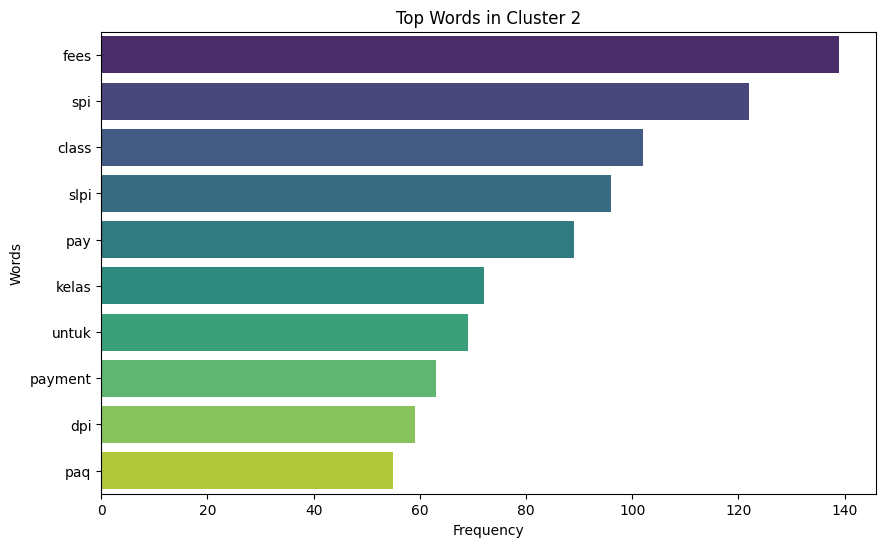


Cluster 6 Visualization:


C:\Users\USER\AppData\Local\Temp\ipykernel_2908\3846168168.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=words, palette='viridis')


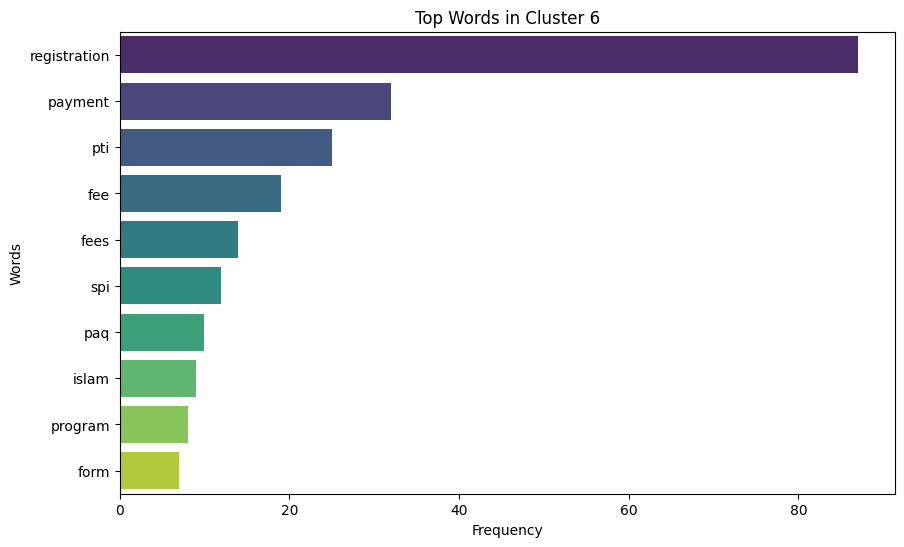


Cluster 7 Visualization:


C:\Users\USER\AppData\Local\Temp\ipykernel_2908\3846168168.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=words, palette='viridis')


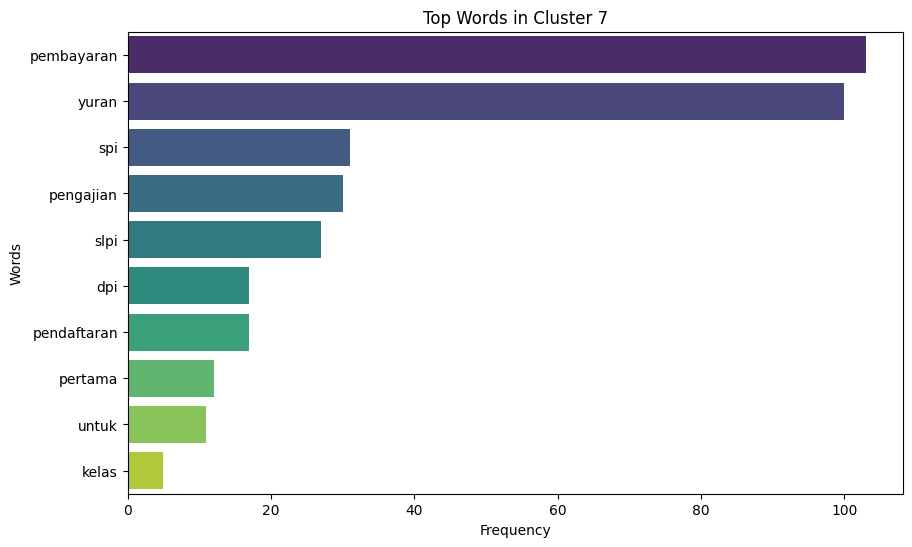


Cluster 3 Visualization:


C:\Users\USER\AppData\Local\Temp\ipykernel_2908\3846168168.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=words, palette='viridis')


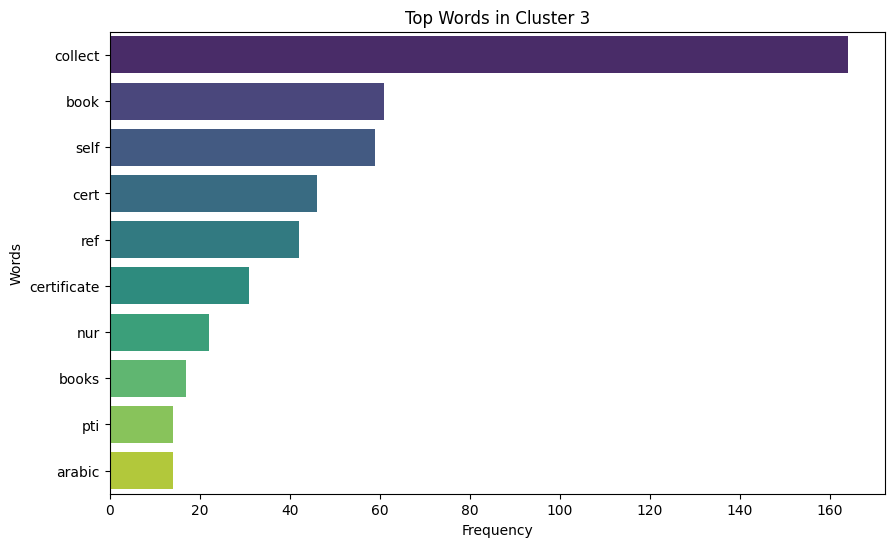


Cluster 1 Visualization:


C:\Users\USER\AppData\Local\Temp\ipykernel_2908\3846168168.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=words, palette='viridis')


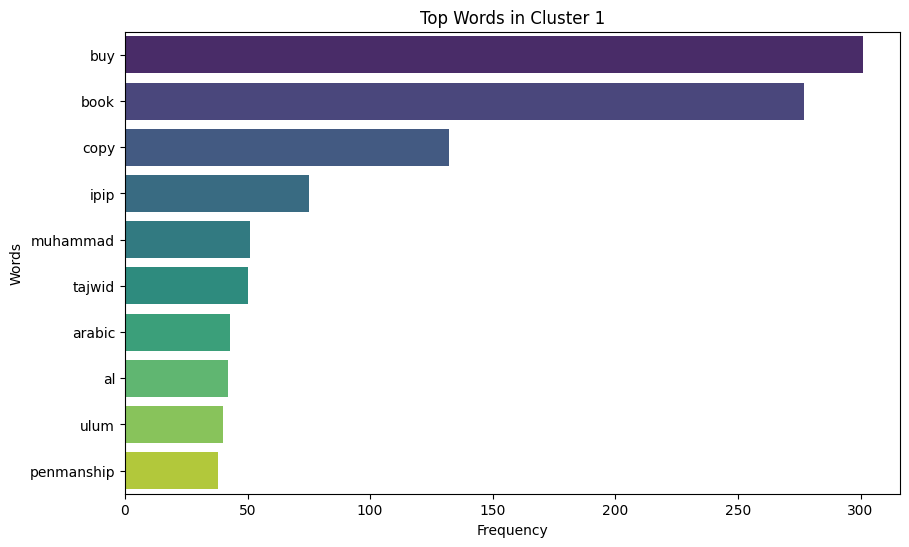


Cluster 4 Visualization:


C:\Users\USER\AppData\Local\Temp\ipykernel_2908\3846168168.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=words, palette='viridis')


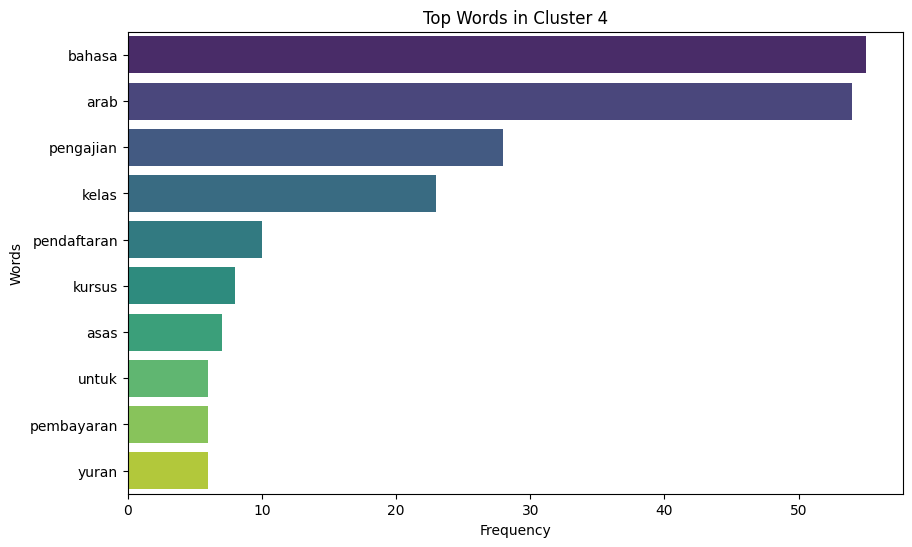


Cluster 5 Visualization:


C:\Users\USER\AppData\Local\Temp\ipykernel_2908\3846168168.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=words, palette='viridis')


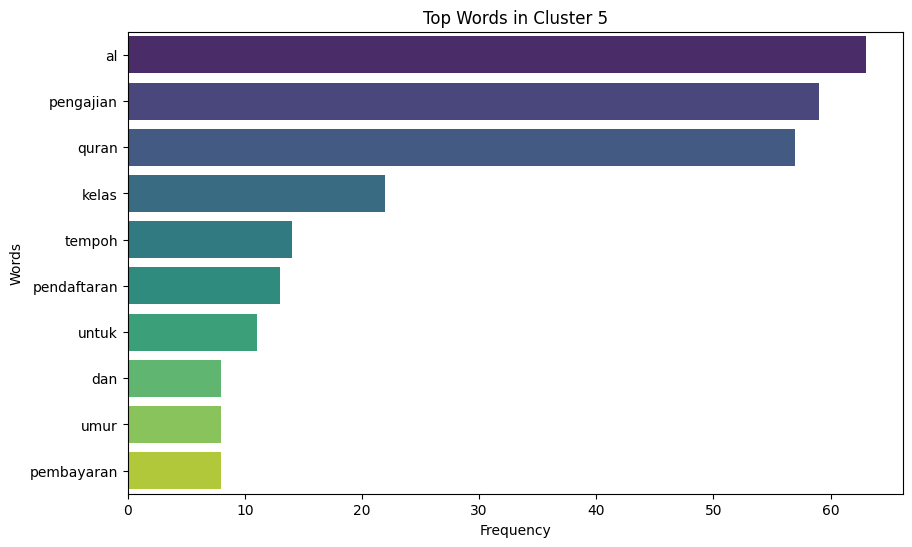


Cluster 0 Visualization:


C:\Users\USER\AppData\Local\Temp\ipykernel_2908\3846168168.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=words, palette='viridis')


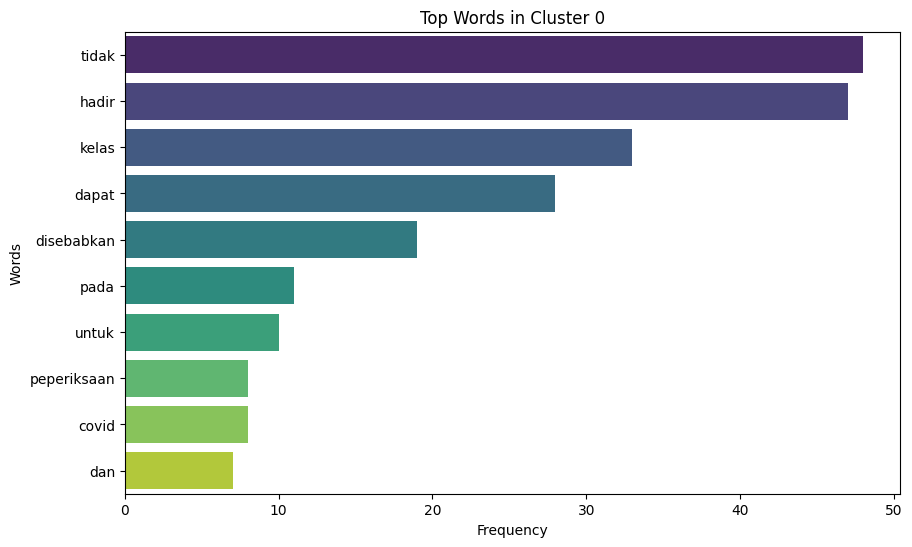


Cluster 8 Visualization:


C:\Users\USER\AppData\Local\Temp\ipykernel_2908\3846168168.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=words, palette='viridis')


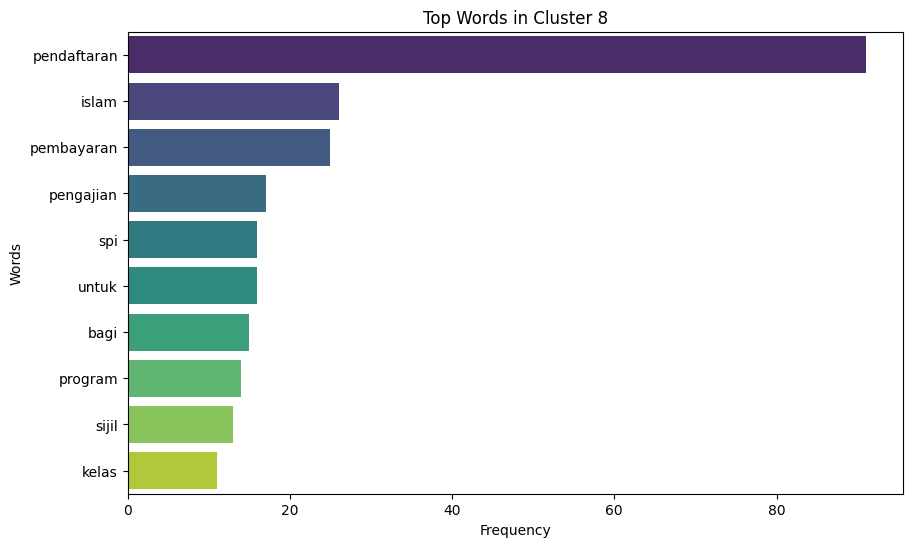


Cluster 9 Visualization:


C:\Users\USER\AppData\Local\Temp\ipykernel_2908\3846168168.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=words, palette='viridis')


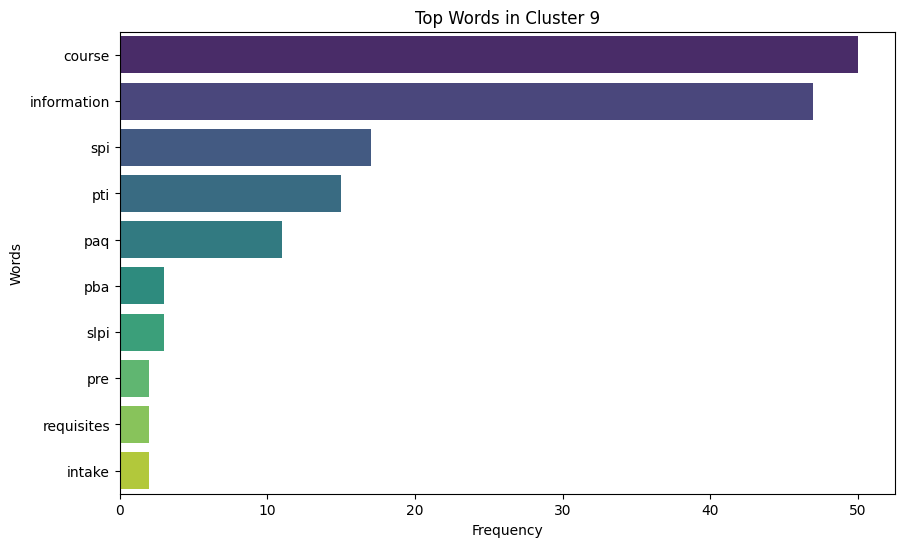

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Function to plot the most common words for each cluster
def plot_top_words(words_freq, cluster_label):
    # Unpack the words and their frequencies
    words = [word for word, freq in words_freq]
    freqs = [freq for word, freq in words_freq]

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=freqs, y=words, palette='viridis')
    plt.title(f"Top Words in Cluster {cluster_label}")
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Create a CountVectorizer instance to tokenize words
vectorizer = CountVectorizer(stop_words='english')

# Loop through each cluster to find the most common words and visualize them
for cluster_label in df['cluster'].unique():
    if cluster_label != -1:  # Ignore noise points
        print(f"\nCluster {cluster_label} Visualization:")
        
        # Filter data for the current cluster
        cluster_data = df[df['cluster'] == cluster_label]['Description']
        
        # Convert the text data to a matrix of token counts
        X_cluster = vectorizer.fit_transform(cluster_data)
        
        # Sum up the counts of each word
        word_counts = X_cluster.sum(axis=0)
        
        # Get the words and their corresponding frequencies
        words_freq = [(word, word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
        
        # Sort the words by frequency and get the top 10
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:10]
        
        # Plot the top words for the current cluster
        plot_top_words(words_freq, cluster_label)

In [24]:
# Loop through each cluster to find the most common sentences
for cluster_label in df['cluster'].unique():
    if cluster_label != -1:  # Ignore noise points
        print(f"\nMost common sentences in Cluster {cluster_label}:")
        
        # Filter data for the current cluster
        cluster_data = df[df['cluster'] == cluster_label]['Description']
        
        # Get the most frequent sentences
        sentence_counts = cluster_data.value_counts()
        
        # Display the top 5 most common sentences
        print(sentence_counts.head(5))


Most common sentences in Cluster 2:
Description
pba                     7
birkh                   6
umur                    5
jadual program          5
program takrif islam    4
Name: count, dtype: int64

Most common sentences in Cluster 6:
Description
registration fee payment pti eng    4
registration dpi                    3
registration pti                    3
registration untuk kelas spi        3
registration payment spir 2023      2
Name: count, dtype: int64

Most common sentences in Cluster 7:
Description
pembayaran yuran slpi             11
pembayaran yuran                   8
pembayaran yuran pengajian spi     7
pembayaran yuran dpi               6
pembayaran yuran pengajian         5
Name: count, dtype: int64

Most common sentences in Cluster 3:
Description
self collect spi cert                                      2
collect spi books #13920                                   2
self collect book nota sejarah perundangan islam #13930    2
self collect book pengajian teks hadit


Cluster 2 Visualization:


C:\Users\USER\AppData\Local\Temp\ipykernel_2908\3294972355.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=sentences, palette='viridis')


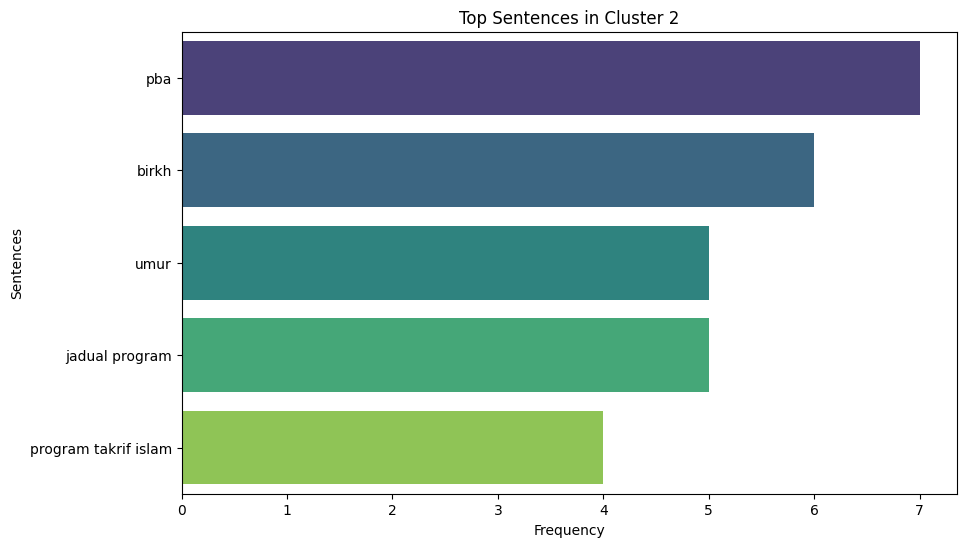


Cluster 6 Visualization:


C:\Users\USER\AppData\Local\Temp\ipykernel_2908\3294972355.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=sentences, palette='viridis')


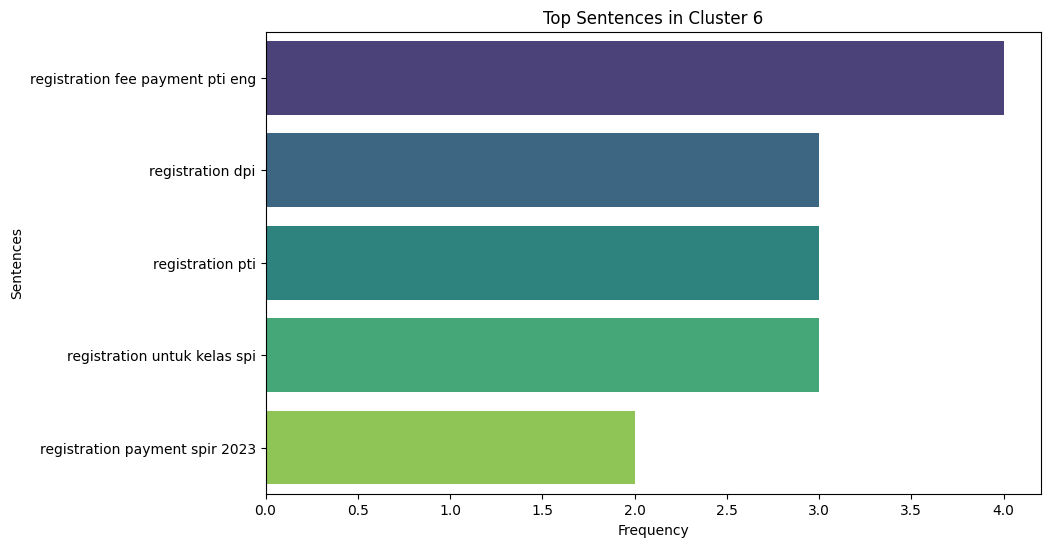


Cluster 7 Visualization:


C:\Users\USER\AppData\Local\Temp\ipykernel_2908\3294972355.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=sentences, palette='viridis')


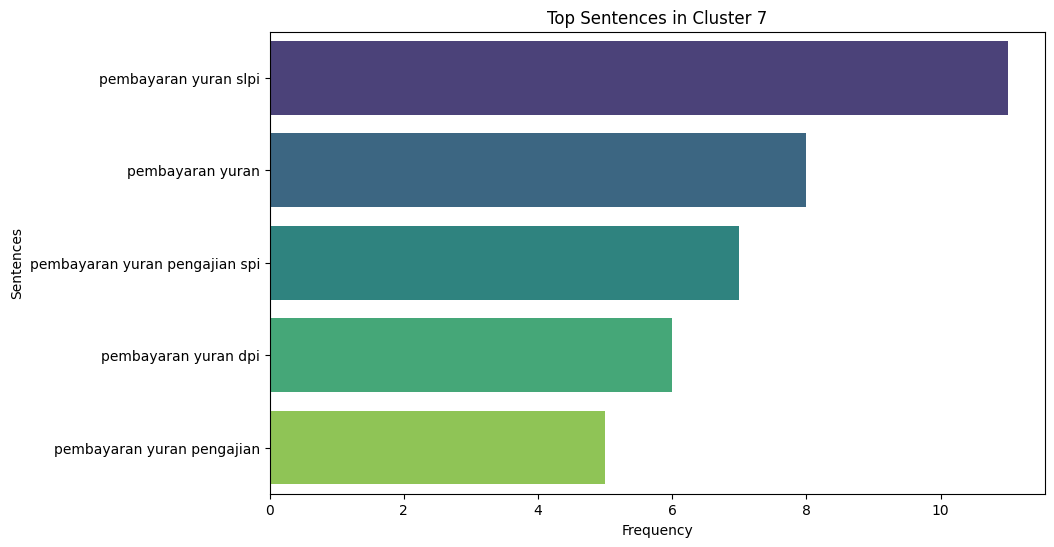


Cluster 3 Visualization:


C:\Users\USER\AppData\Local\Temp\ipykernel_2908\3294972355.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=sentences, palette='viridis')


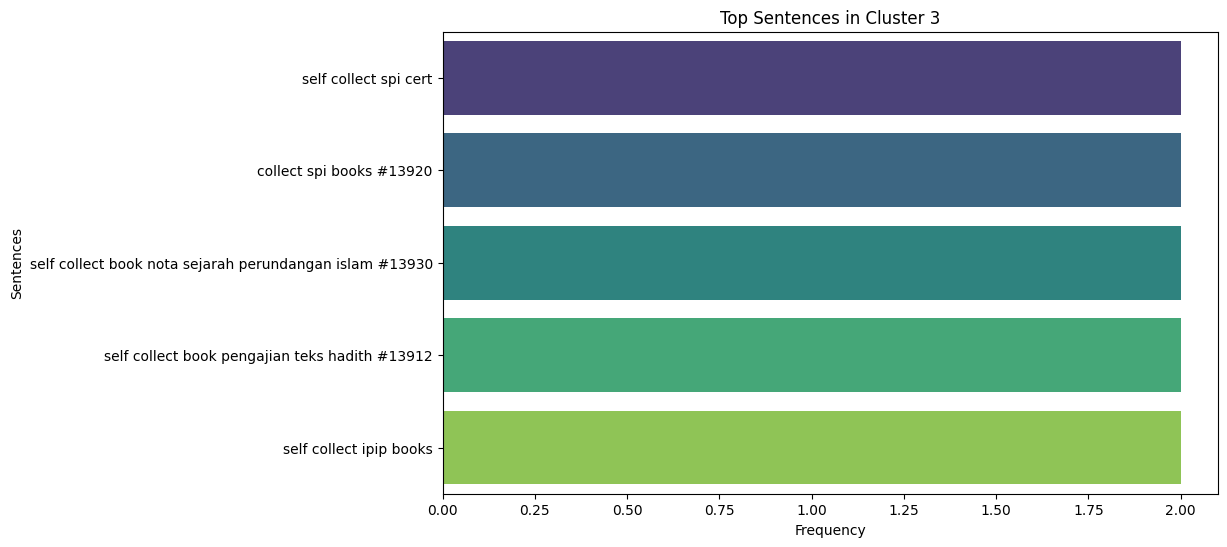


Cluster 1 Visualization:


C:\Users\USER\AppData\Local\Temp\ipykernel_2908\3294972355.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=sentences, palette='viridis')


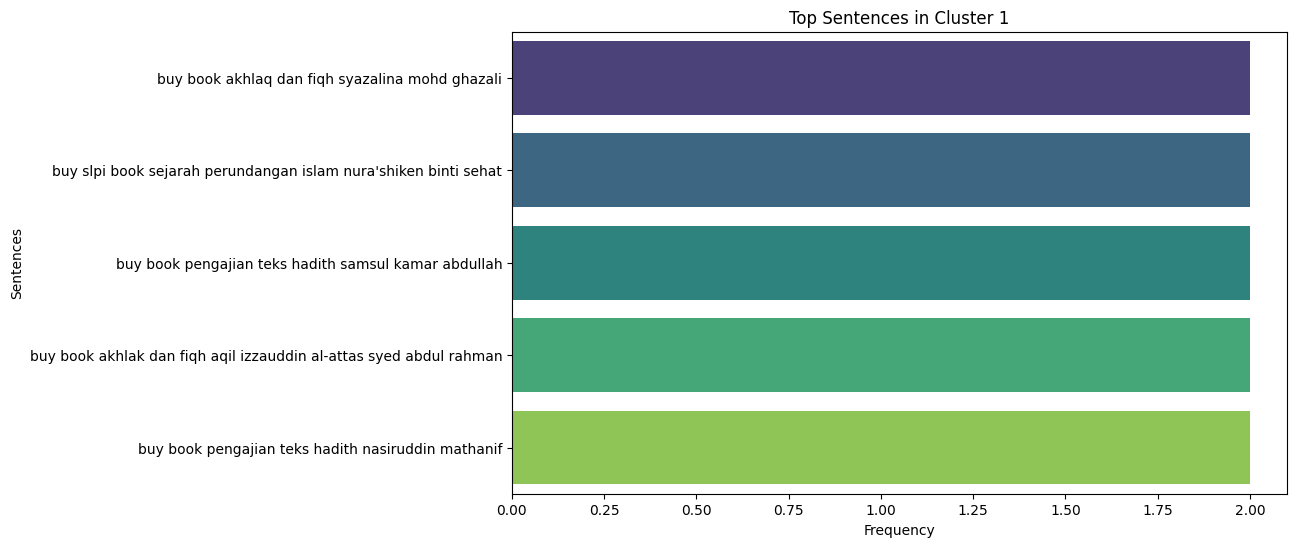


Cluster 4 Visualization:


C:\Users\USER\AppData\Local\Temp\ipykernel_2908\3294972355.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=sentences, palette='viridis')


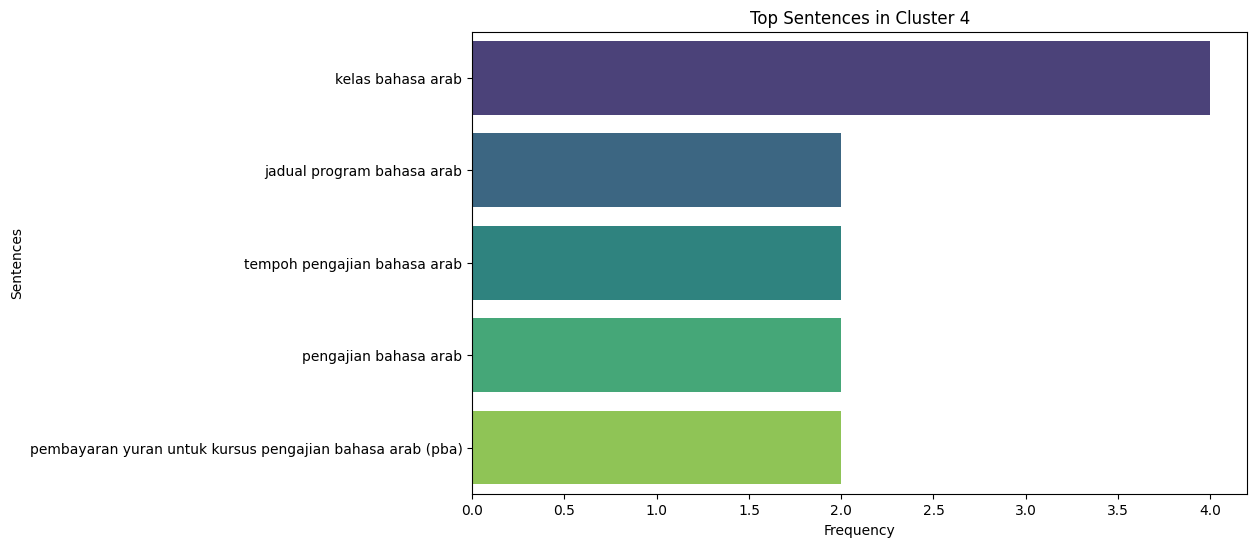


Cluster 5 Visualization:


C:\Users\USER\AppData\Local\Temp\ipykernel_2908\3294972355.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=sentences, palette='viridis')


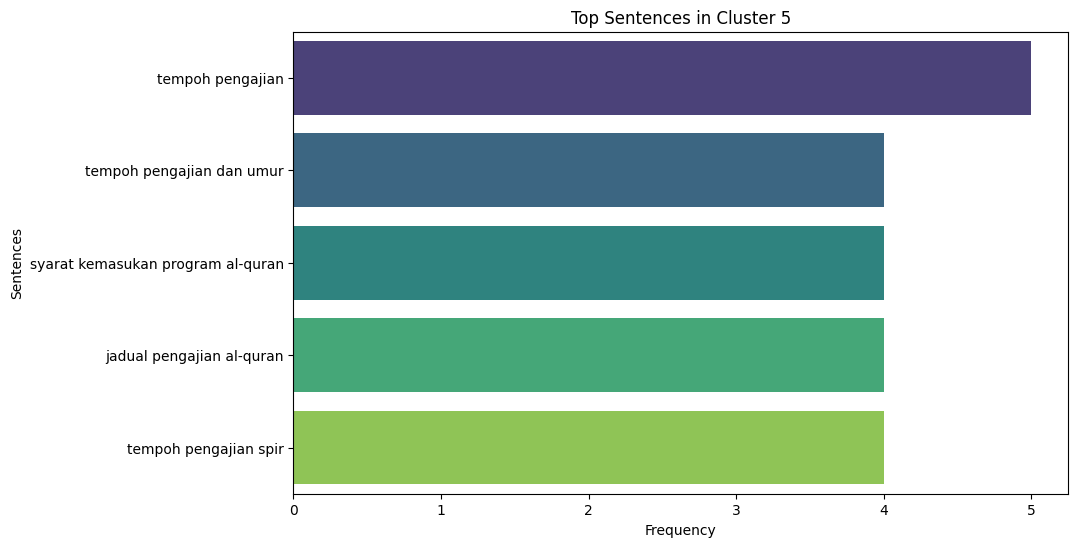


Cluster 0 Visualization:


C:\Users\USER\AppData\Local\Temp\ipykernel_2908\3294972355.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=sentences, palette='viridis')


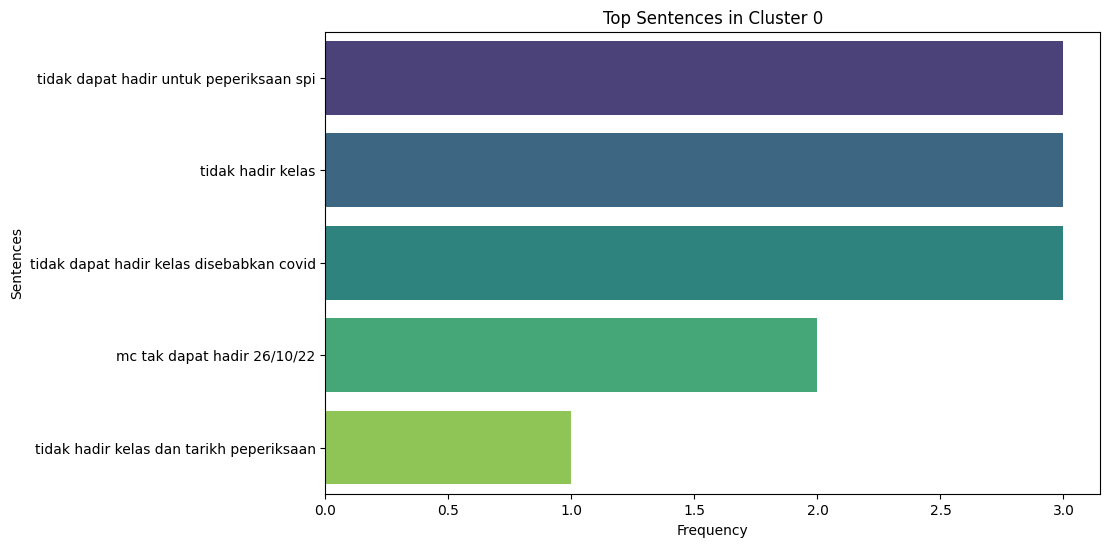


Cluster 8 Visualization:


C:\Users\USER\AppData\Local\Temp\ipykernel_2908\3294972355.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=sentences, palette='viridis')


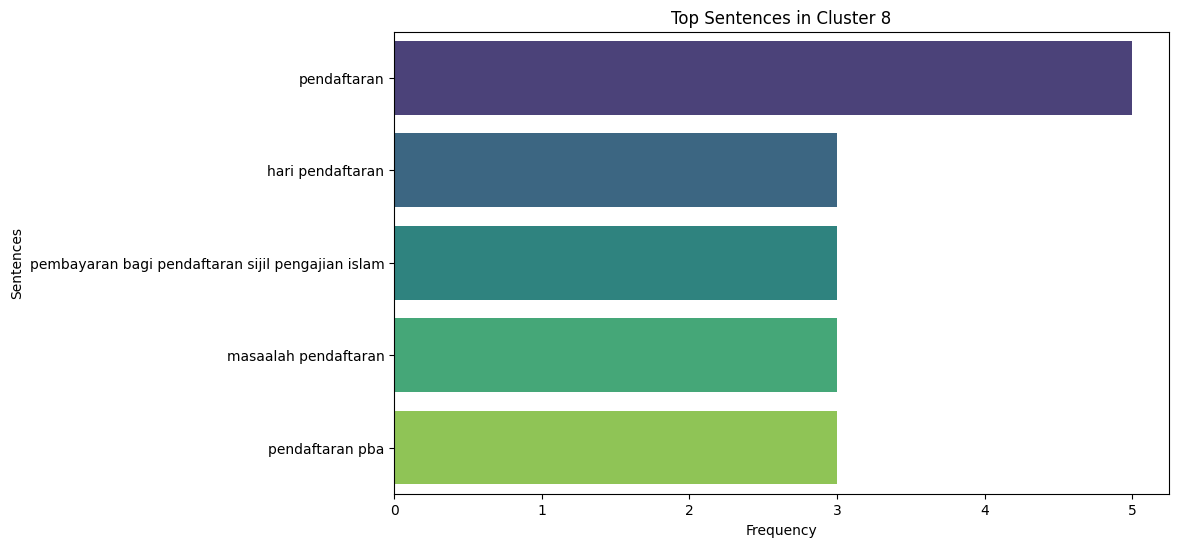


Cluster 9 Visualization:


C:\Users\USER\AppData\Local\Temp\ipykernel_2908\3294972355.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=sentences, palette='viridis')


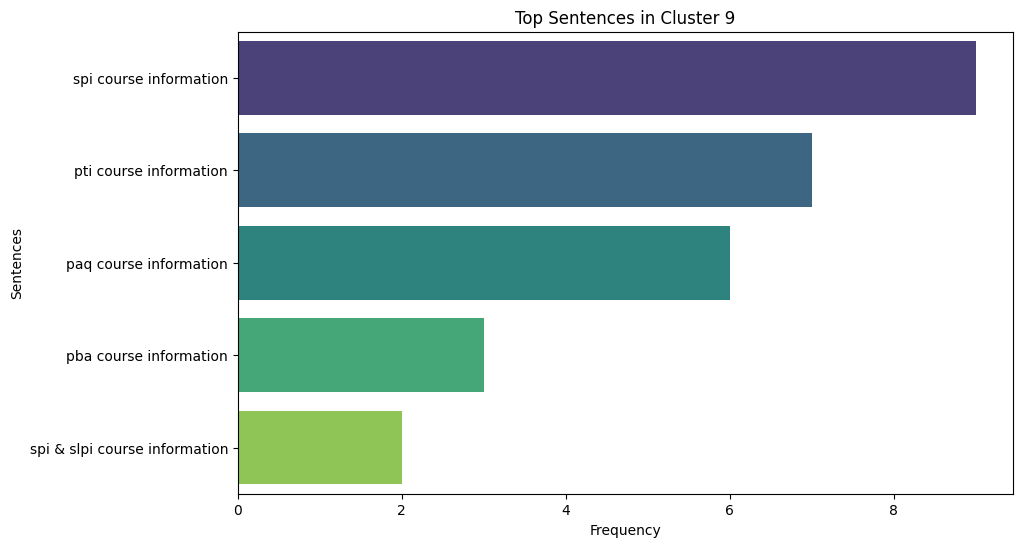

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the most common sentences for each cluster
def plot_top_sentences(sentences_freq, cluster_label):
    # Unpack the sentences and their frequencies
    sentences = [sentence for sentence, freq in sentences_freq]
    freqs = [freq for sentence, freq in sentences_freq]

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=freqs, y=sentences, palette='viridis')
    plt.title(f"Top Sentences in Cluster {cluster_label}")
    plt.xlabel('Frequency')
    plt.ylabel('Sentences')
    plt.show()

# Loop through each cluster to find the most common sentences and visualize them
for cluster_label in df['cluster'].unique():
    if cluster_label != -1:  # Ignore noise points
        print(f"\nCluster {cluster_label} Visualization:")
        
        # Filter data for the current cluster
        cluster_data = df[df['cluster'] == cluster_label]['Description']
        
        # Count the occurrence of each sentence
        sentence_counts = cluster_data.value_counts()
        
        # Get the top 5 most frequent sentences
        sentences_freq = list(sentence_counts.items())[:5]
        
        # Plot the top sentences for the current cluster
        plot_top_sentences(sentences_freq, cluster_label)


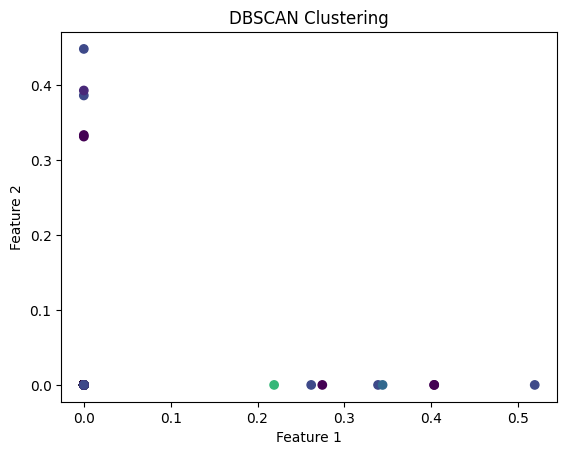

In [17]:
# Assuming X is your original 2D dataset (e.g., after dimensionality reduction)
plt.scatter(X.toarray()[:, 0], X.toarray()[:, 1], c=df['cluster'])
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [20]:
# Show the unique cluster labels
unique_clusters = df['cluster'].unique()
print(f"Cluster names: {unique_clusters}")


Cluster names: [2 6 7 3 1 4 5 0 8 9]


In [22]:
# Generate potential FAQs based on the clustering
for cluster_label in df['cluster'].unique():
    if cluster_label != -1:  # Exclude noise points
        print(f"\nCluster {cluster_label}:")
        cluster_data = df[df['cluster'] == cluster_label]
        
        # Show the most common purposes of contact and descriptions in this cluster
        print("Most common Purpose of contact:")
        print(cluster_data['Purpose of contact'].value_counts().head())

        print("\nMost common Descriptions:")
        print(cluster_data['Description'].value_counts().head())
        
        print("\nMost common Actions Taken:")
        print(cluster_data['Action Taken'].value_counts().head())


Cluster 2:
Most common Purpose of contact:
Purpose of contact
Enquiry        708
Transaction    237
Name: count, dtype: int64

Most common Descriptions:
Description
pba                     7
birkh                   6
umur                    5
jadual program          5
program takrif islam    4
Name: count, dtype: int64

Most common Actions Taken:
Action Taken
Advised accordingly                         374
Received payment                             53
Adviced Accordingly                          43
Adviced accordingly                          42
Received payment and adviced accordingly     42
Name: count, dtype: int64

Cluster 6:
Most common Purpose of contact:
Purpose of contact
Transaction    61
Enquiry        29
Name: count, dtype: int64

Most common Descriptions:
Description
registration fee payment pti eng    4
registration dpi                    3
registration pti                    3
registration untuk kelas spi        3
registration payment spir 2023      2
Name: count, dtyp

In [14]:
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = X.toarray()

# Find the top words in each enquiry
top_n = 5
for i in range(len(df)):
    sorted_indices = tfidf_scores[i].argsort()[-top_n:]
    top_keywords = [feature_names[index] for index in sorted_indices]
    print(f"Enquiry {i+1} Top Keywords: {top_keywords}")

Enquiry 1 Top Keywords: ['graduated', 'english', 'permintaan', 'sekolah', 'surat']
Enquiry 2 Top Keywords: ['going', 'giro', 'ghazali', 'spi', 'registration']
Enquiry 3 Top Keywords: ['going', 'pembayaran', 'dan', 'buku', 'hafalan']
Enquiry 4 Top Keywords: ['google', 'going', 'ghazi', 'zulkifli', 'buku']
Enquiry 5 Top Keywords: ['graduation', 'spi', 'slpi', 'course', 'change']
Enquiry 6 Top Keywords: ['zulkifli', 'class', 'disebabkan', 'ulangan', 'covid']
Enquiry 7 Top Keywords: ['going', 'giro', 'ghazi', 'buku', 'pembelian']
Enquiry 8 Top Keywords: ['giro', 'graduation', 'finance', 'registration', 'dpi']
Enquiry 9 Top Keywords: ['giro', 'graduation', 'finance', 'registration', 'dpi']
Enquiry 10 Top Keywords: ['graduated', 'untuk', 'registration', 'dpi', 'berminat']
Enquiry 11 Top Keywords: ['going', 'giro', 'hilman', 'zulkifli', 'pembayaran']
Enquiry 12 Top Keywords: ['giro', 'graduation', 'dan', 'peperiksaan', 'certificate']
Enquiry 13 Top Keywords: ['google', 'habibah', 'payment', '

In [16]:
import gensim
from gensim import corpora

# Tokenize the enquiries
enquiries_tokens = [text.split() for text in df['processed_enquiry']]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(enquiries_tokens)

# Convert to a bag-of-words representation
corpus = [dictionary.doc2bow(text) for text in enquiries_tokens]

# Perform LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Print the topics found
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

KeyError: 'processed_enquiry'